In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
def initialize():
    states = {}
    returns = {}
    policy = {}
    for mysum in range(12, 22):
        for dealsum in range(1,11):
            for ace in [True, False]:
                idx = (mysum, dealsum, ace)
                states[idx] = np.random.rand()
                returns[idx] = []
                if mysum == 20 or mysum == 21:
                    policy[idx]='stick'
                else:
                    policy[idx]='hit'
    return states, returns, policy

In [3]:
stateval, returns, policy = initialize()
games = int(500000)
gamma = 0.9

import gym
env = gym.make("Blackjack")
for game in tqdm(range(games)):
    episodes = []
    obs = env.reset()
    while True:
        if obs[0] < 20:
            action = 1
        else:
            action = 0
        env.step(action)
        new, reward, done, desc = env.step(action)
        episodes.append((obs, action, reward))
        obs = new
        if done:
            break

    forwards = sorted(episodes, reverse=False)
    backwards = sorted(episodes, reverse=True)
    G=0
    for T, step in enumerate(backwards):
        state, action, reward = step
        if state not in stateval.keys():
            continue
        G = gamma * G + int(reward)
        if state not in [step[0] for step in forwards[:-T]]:
            returns[state].append(G)
            stateval[state] = np.average(returns[state], axis=0)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gym/envs/registration.py:512: UserWarning: WARN: Using the latest versioned environment `Blackjack-v1` instead of the unversioned environment `Blackjack`
  f"Using the latest versioned environment `{latest_versioned_spec.id}` "
100%|██████████| 500000/500000 [03:31<00:00, 2366.33it/s]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


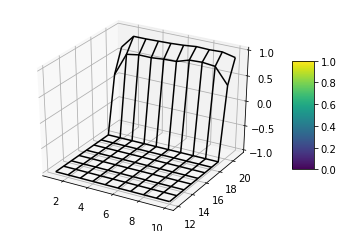

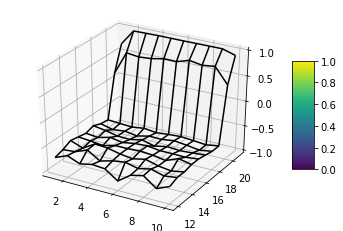

In [4]:
noace = [v[1] for v in stateval.items() if v[0][-1]==False]
ace = [v[1] for v in stateval.items() if v[0][-1]==True]
noace = np.array(noace).reshape(10,10)
ace = np.array(ace).reshape(10,10)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(1, 11, 1)
Y = np.arange(12, 22, 1)
X, Y = np.meshgrid(X, Y)
Z = np.array(noace).reshape(10,10)
surf = ax.plot_wireframe(X, Y, Z, color='black')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(1, 11, 1)
Y = np.arange(12, 22, 1)
X, Y = np.meshgrid(X, Y)
Z = np.array(ace).reshape(10,10)
surf = ax.plot_wireframe(X, Y, Z, color='black')
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show()